<a href="https://colab.research.google.com/github/Locojuan9/se-ales_y_sistemas/blob/main/Parciales/Parcial_2_SyS_Juan_Alejandro_Villodres_Perdomo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Punto 1 - Simulación

* Se grafican la señal original y su versión simplificada para comprobar que sean iguales

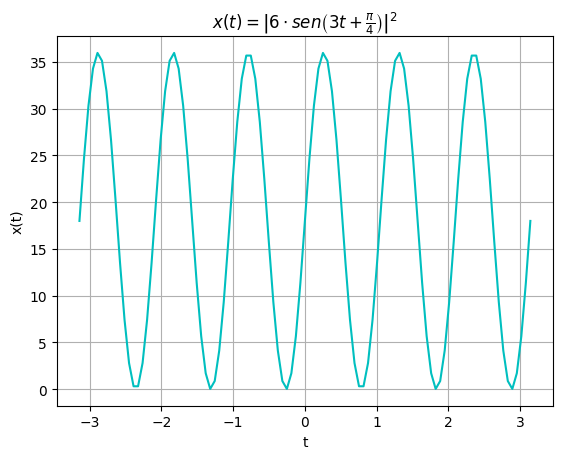

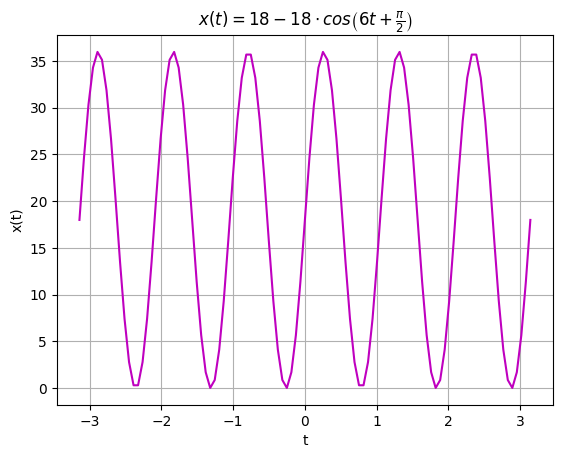

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,IntSlider
import warnings
from matplotlib import animation, rc
from IPython.display import HTML

T = 2*np.pi # Periodo
Fo = 1/T # Frecuencia
Fs = 100 * Fo # Frecuencia de muestreo cumpliendo Nyquist
tv = np.arange(-T/2, T/2, 1/Fs) # Vector de tiempo
Nm = len(tv) # Número de muestras

x_t = abs(6*np.sin(3*tv + np.pi/4))**2 # Función original
plt.plot(tv, x_t, 'c')
plt.title(r'$x(t)=\left|6 \cdot sen \left(3t + \frac{\pi}{4}\right)\right|^2$')
plt.ylabel('x(t)')
plt.xlabel('t')
plt.grid(True)
plt.show()

x_t = 18-18*np.cos(6*tv + np.pi/2) # Función simplificada
plt.plot(tv, x_t, 'm')
plt.ylabel('x(t)')
plt.xlabel('t')
plt.title(r'$x(t)=18-18 \cdot cos \left(6t + \frac{\pi}{2}\right)$')
plt.grid(True)
plt.show()

* Se crean las bases de la serie exponencial

In [10]:
N = 10 # Número de armónicos
wo = 2*np.pi/T # frecuencia fundamental

phin = np.zeros((Nm, 2*N+1), dtype=np.complex_)

for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)

* Se crea el espectro según los cálculos realizados a mano

In [11]:
nv = np.linspace(-N, N, 2*N+1) # Vector de armónicos

# Todos los valores serán 0 excepto 3
Cn = np.zeros(2*N+1, dtype=np.complex_)

Cn[N] = 18+0j # Nivel DC
Cn[N+6] = -9j # Armónico 6
Cn[N-6] = 9j # Armónico -6

* Se plotea el espectro en fase, magnitud, y su parte real e imaginaria.

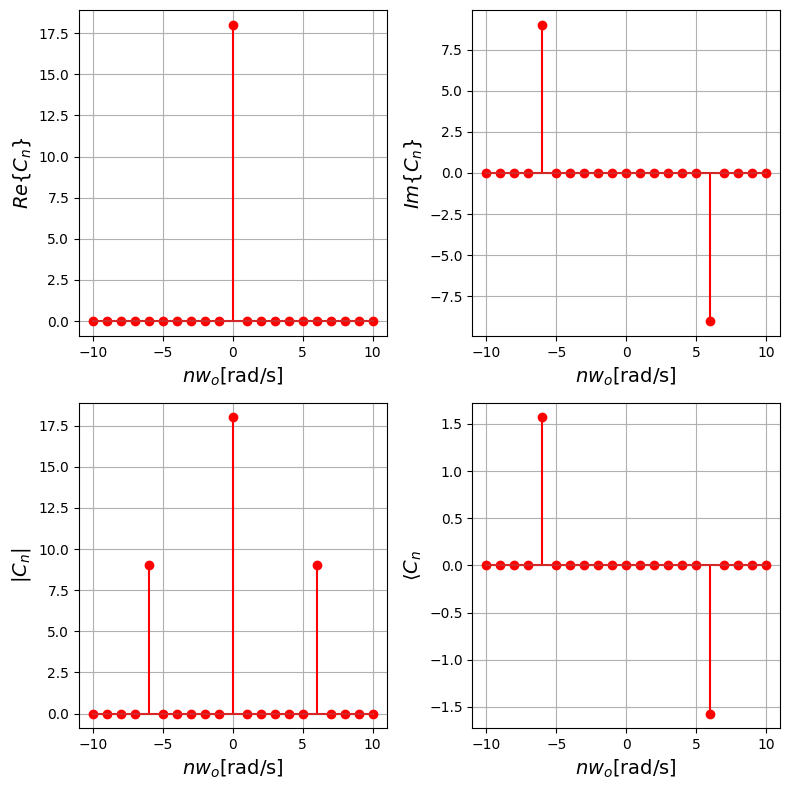

In [13]:
# Parte real del espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

# Parte imaginaria del espectro
plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

# Magnitud del espectro
plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

# Fase del espectro
plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

* Se calcula el error relativo en base a la potencia de reconstrucción calculada manualmente

In [ ]:
Px = 486 # Potencia de la reconstrucción

fig, ax = plt.subplots(2, 3,figsize=(12,5))

def update(n):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    #espectro
    ind = np.arange(N-n,N+n+1) #armónicos a considerar
    ax[0,0].stem(nv, abs(Cn), 'b')#magnitud del espectro
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')#magnitud del espectro
    ax[0,0].set_xlabel(r'$nw_o$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    #componentes espectrales
    ce = phin[:,ind].dot(np.diag(Cn[ind]) )
    ax[0,1].plot(np.real(ce))#componente real
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\phi_n(t)\}$')

    ax[0,2].plot(np.imag(ce))#componente imaginario
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\phi_n(t)\}$')

    #reconstruccion
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind]) # dot calcula el producto entre vectores
    #error en t
    et = x_t - xe

    ax[1,1].plot(tv,x_t,'r',linewidth=4,label='$x(t)$')
    ax[1,1].plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    ax[1,1].plot(tv,et,color='g',label='$e(t)$') # señal estimada o filtrada
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100*er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax[1,0].axis('off')
    ax[1,2].axis('off')
    plt.subplots_adjust(wspace=0.5,hspace=0.7)
    plt.show()

#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.arange(0,N+1,1), blit=False)
rc('animation', html='jshtml')

* Se plotea la animación

In [16]:
warnings.filterwarnings('ignore')
anim

# Punto 2 - Modulación AM

La transformada de Fourier de la señal modulada se puede encontrar como:

$$Y(\omega) = \mathscr{F}\{y(t)\} = \mathscr{F}\left\{\left(1+\frac{m(t)}{A_c}\right)c(t)\right\}=\mathscr{F}\{c(t)\}+\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\}$$

En este caso (utilizando tablas de Fourier):

$$C(\omega) = \mathscr{F}\{c(t)\} = \mathscr{F}\{A_c\cos(2\pi F_c t)\} = A_c\mathscr{F}\left\{\frac{e^{j2\pi F_ct}+e^{-j2\pi F_ct}}{2}\right\}$$

y

$$\mathscr{F\{e^{\pm j\omega_0 t}\}} = 2\pi\delta(\omega \mp \omega_0)$$

Por consiguiente:

$$\boxed{C(\omega) = A_c\pi(\delta(\omega - 2\pi F_c)+\delta(\omega + 2\pi F_c))}$$

De forma similar:

$$\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\} = \frac{1}{A_c}\mathscr{F}\{m(t)A_c\cos(2\pi F_c t)\} = \mathscr{F}\{m(t)\cos(2\pi F_c t)\} = \mathscr{F}\left\{\frac{m(t)e^{j2\pi F_ct}+m(t)e^{-j2\pi F_ct}}{2}\right\}$$

teniendo en cuenta que:

$$\mathscr{F}\{x(t)e^{\pm j\omega_0t}\} = X(\omega \mp \omega_0)$$


Entonces:

$$\boxed{\frac{1}{A_c}\mathscr{F}\{m(t)c(t)\} = \frac{1}{2}\left(M(\omega - 2\pi F_c)+M(\omega + 2\pi F_c)\right)}$$


Finalmente, el espectro de la señal modulada se puede escribir como:

$$\boxed{Y(\omega) = A_c\pi(\delta(\omega - 2\pi F_c)+\delta(\omega + 2\pi F_c)) + \frac{1}{2}\left(M(\omega - 2\pi F_c)+M(\omega + 2\pi F_c)\right)}$$

\\


---


\\

Ahora, se procede con la simulación.

* Se instalan las librerías para descargar vídeos de YouTube y reproducir audios en Google Colab

In [ ]:
!python3 -m pip install --force-reinstall -U https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

In [ ]:
!pip install soundfile

* Se importan las librerías necesarias

In [19]:
import yt_dlp as youtube_dl
import soundfile as sf
import subprocess
from IPython.display import Audio
import os
import numpy as np
import matplotlib.pyplot as plt

* Se crea una función que permite descargar vídeos de YouTube y almacenarlos en formato .mp3

In [20]:
def download_ytvid_as_mp3(video_url,name):
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

* Se llama la función para descargar el vídeo y posteriormente se convierte a formato .wav

In [ ]:
name_ = 'Punto_2/audio'

try:
    os.remove(f'{name_}.wav')
    print('Archivo removido con éxito\n')
except:
    print('El archivo ya ha sido removido\n')

# Link
x_input = 'https://www.youtube.com/watch?v=tG35R8F2j8k'

# descargar mp3 desde youtube
download_ytvid_as_mp3(x_input, name_)
# convertir a .wav
subprocess.call(['ffmpeg', '-y', '-i', name_+'.mp3', name_+'.wav'])

# Eliminar archivos innecesarios
try:
    os.remove(f'{name_}.mp3')
    print('Archivo removido con éxito\n')
except:
    print('El archivo ya ha sido removido\n')

* Se extraen los datos necesarios de la canción (Frecuencia de la canción y contenido en audio)

In [22]:
nout = name_ + '.wav'
xa, fs = sf.read(nout)
print('Frecuencia de muestreo: %.2f[Hz]\naudio: "%s"' % (fs, nout))

Frecuencia de muestreo: 48000.00[Hz]
audio: "Punto_2/audio.wav"


* Se crea la señal mensaje guardando solo los segundos 20 a 25 de la canción

In [23]:
xpro = xa.copy() # Se crea una copia de la canción para trabajar sobre ella y no modificar la original

ti = 20 # Tiempo inicial
tf = 25 # Tiempo final

m = xpro[int(ti*fs):int((tf*fs)), 0] # Señal mensaje (m) en audio mono desde el segundo ti a tf

* Se reproduce la señal mensaje creada

In [24]:
Audio(m, rate=fs)

* Se plotea la señal mensaje en función del tiempo

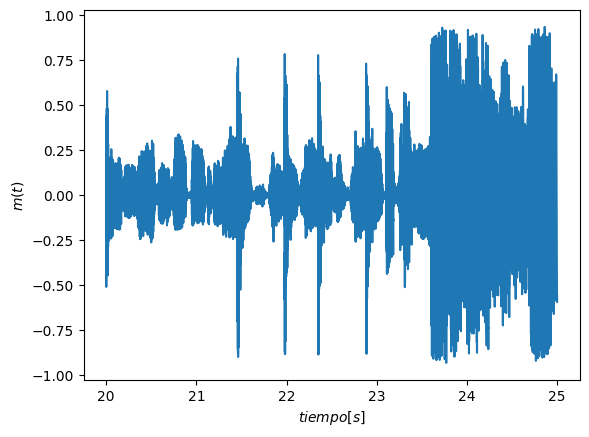

In [26]:
tt = np.arange(ti, tf, 1/fs) # Vector de tiempo

plt.plot(tt, m) # Señal mensaje (m) vs Tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.show()

* Se calcula la transformada de Fourier de la señal mensaje con el fin de obtener su vector de frecuencias

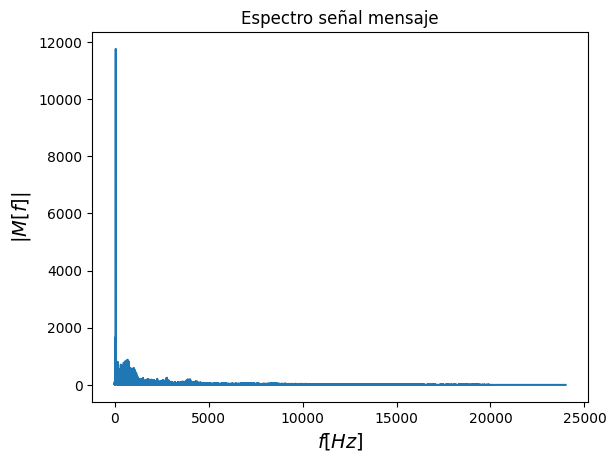

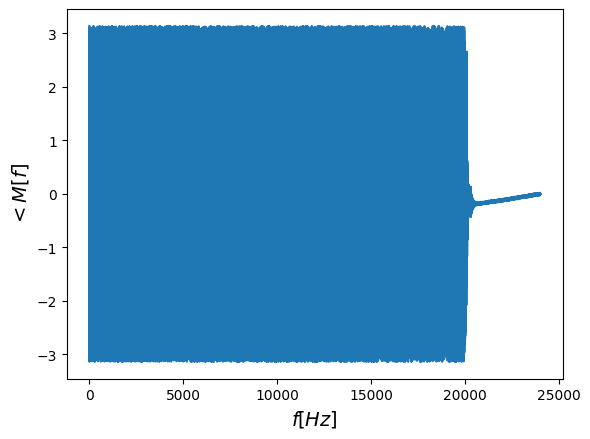

In [27]:
Mw = np.fft.rfft(m) # Se calcula la transformada rápida (real) de Fourier a la señal mensaje (m)
vf = np.fft.rfftfreq(m.shape[0], 1/fs) # Se crea el vector de frecuencias de la señal mensaje (m)

plt.plot(vf, abs(Mw)) # Magnitud de la señal mensaje vs Frecuencia
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw)) # Fase de la señal mensaje vs Frecuencia
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

* Se crea la señal portadora

In [28]:
Fc = 21000 # Frecuencia de la señal portadora (c) > Fmax (aprox. 20 kHz)
Im = 1 # Índice de modulación
Ac = max(abs(m))/Im # Amplitud de la señal portadora (c)

c = Ac*np.cos(2*np.pi*Fc*tt) # Señal portadora (c)

* Se reproduce la señal portadora

In [29]:
Audio(c,rate=fs)

* Se plotea la señal portadora en función del tiempo

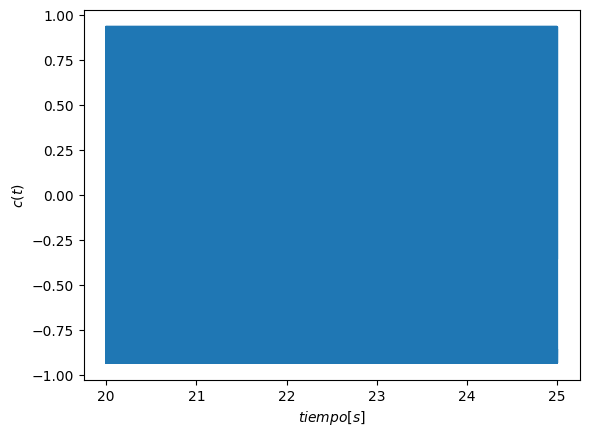

In [30]:
plt.plot(tt,c) # Señal portadora (c) vs tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

* Se calcula la transformada de Fourier de la señal portadora con el fin de obtener su vector de frecuencias

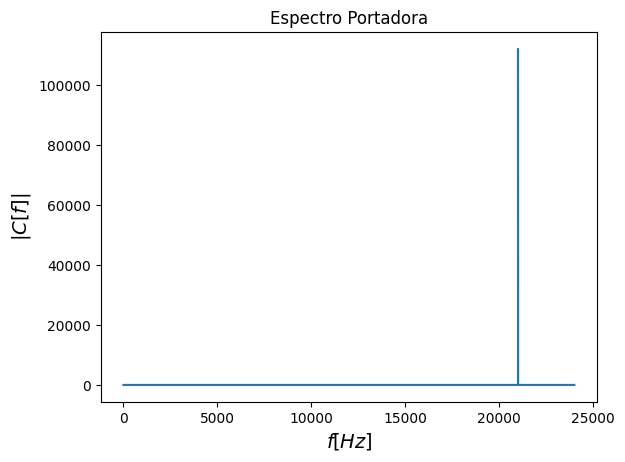

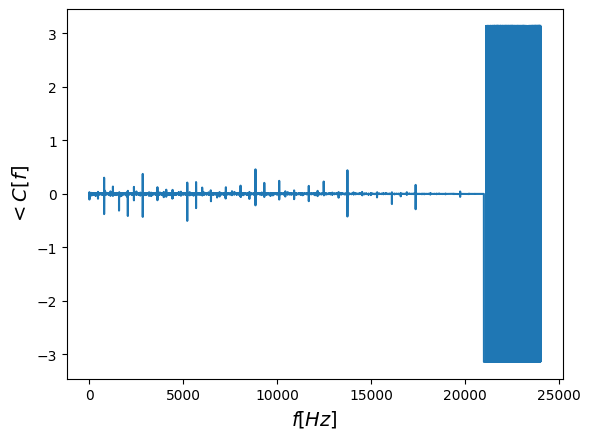

In [33]:
Cw = np.fft.rfft(c) # Transformada rápida (real) de Fourier a la señal portadora (c)
plt.plot(vf,abs(Cw)) # Se plotea la magnitud respecto al vector de frecuencias creado anteriormente
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Cw)) # Fase vs Frecuencia
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

* Se plotea la relación entre la señal portadora y la señal mensaje

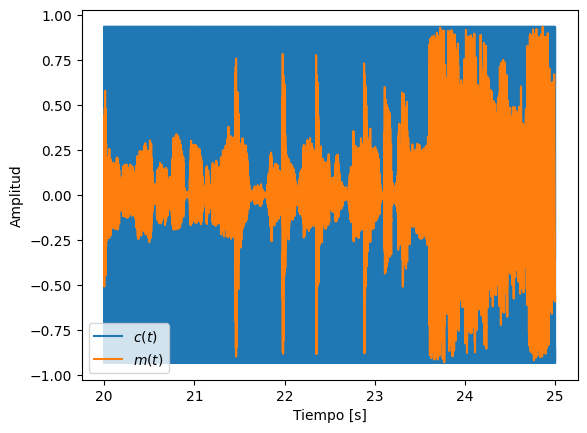

In [37]:
plt.plot(tt, c, label='$c(t)$')
plt.plot(tt, m, label='$m(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

* Se crea la señal modulada sabiendo que $y(t)=(1+\frac{m(t)}{A_c})\cdot c(t)$, donde la señal portdora es $c(t) = A_c \text{cos}(2 \pi F_c t)$, $m(t)$ son los 5 segundos de canción escogida, y $A_c$ es la amplitud de la señal portadora. $A_c, m(t), c(t) ∈ ℝ$.

In [38]:
y = (1+m/Ac)*c # Señal modulada AM

* Se reproduce la señal ya modulada

In [39]:
#repoducir modulada
Audio(y,rate=fs)

* Plot de la señal modulada en función del tiempo

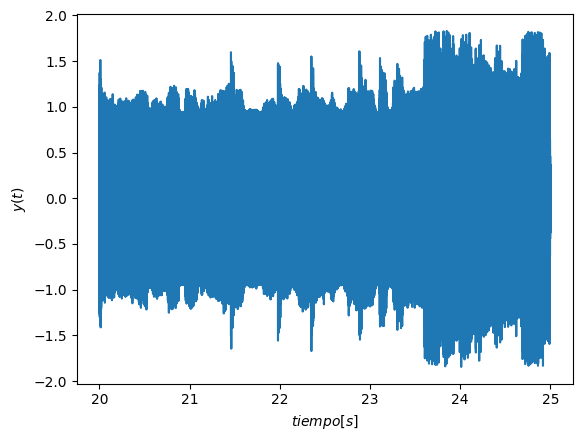

In [40]:
plt.plot(tt,y) # Señal modulada (y) vs tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

* Se calcula la transformada de Fourier de la señal modulada para obtener su vector de frecuencias

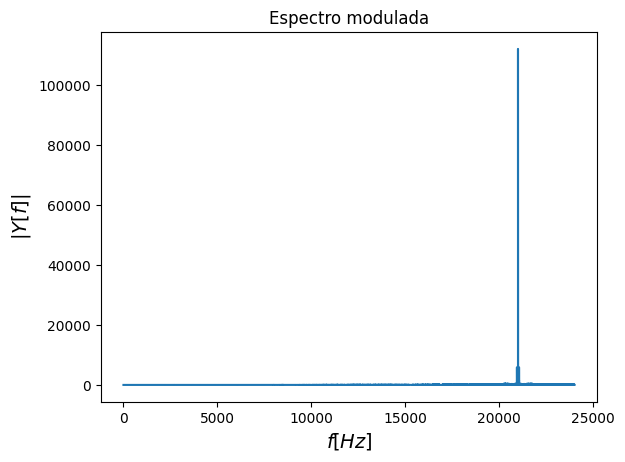

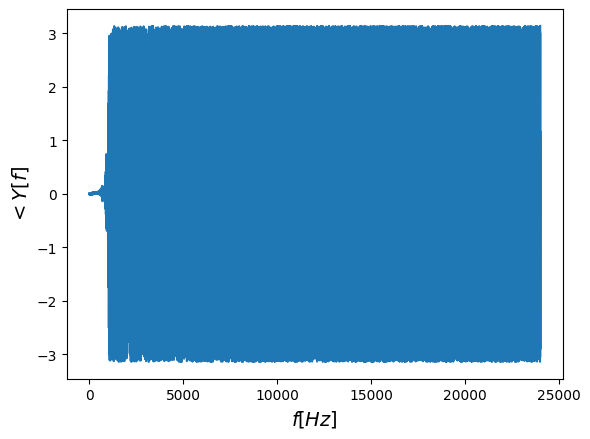

In [41]:
Yw = np.fft.rfft(y) # Transformada rápida (real) de Fourier en la señal modulada

plt.plot(vf, abs(Yw)) # Magnitud de la señal modulada vs frecuencia
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Yw)) # Fase vs frecuencia
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

* Relacionamos los 3 espectros de frecuencia

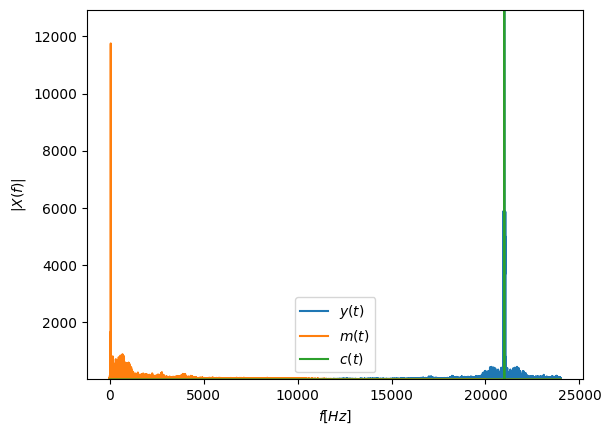

In [46]:
plt.plot(vf, abs(Yw), label='$y(t)$')
plt.plot(vf, abs(Mw), label='$m(t)$')
plt.plot(vf, abs(Cw), label='$c(t)$')
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Mw)), 1.1*max(abs(Mw))])
plt.legend()
plt.show()

# Punto 3 - Detección de fallos en motor

* Se reinicia el entorno

In [52]:
from shutil import rmtree
import os
try:
    rmtree('Punto_3')
    os.mkdir('Punto_3')
    print('Reinicio exitoso')
except:
    print('Carpeta no existente, creando entorno')
    os.mkdir('Punto_3')

Reinicio exitoso


* Se descarga la base de datos para el monitoreo de fallas

In [ ]:
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Punto_3/datos.zip && rm -rf /tmp/cookies.txt
!unzip -o Punto_3/datos.zip -d Punto_3
!dir

* Se importan las librerías necesarias

In [49]:
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
from sklearn.metrics import pairwise_distances
import matplotlib
from sklearn.model_selection import train_test_split

* Se almacena la información de la base de datos en un diccionario

In [ ]:
warnings.filterwarnings('ignore')

path_ = 'Punto_3/CaractCE.mat' # Path de la base de datos descargada
dicX = sio.loadmat(path_) # Almacena la información de la base de datos en un diccionario
dicX.keys() # Claves del diccionario

* Se almacenan los datos en el tiempo y los tipos de fallo

In [ ]:
Xt = dicX['F'] # Matriz de datos en el tiempo
Fs = 12000 # Frecuencia de muestreo
Tl = Xt.shape[1]/Fs # Tamaño del segmento -> Periodo / Frecuencia de muestreo

print('Xt shape:', Xt.shape)
print('tiempo [s]', Tl) # 0.3333... es el periodo de muestreo

Y = dicX['E'] # Matriz de fallos en los rodamientos
Ytrue = Y[:,2] # Clases de fallos en los rodamientos

labels_ = ['NOR','IR1_0.007','IR1_0.014','IR1_0.021',
           'IR2_0.007','IR2_0.014','IR2_0.021',
           'BE_0.007','BE_0.014','BE_0.021'
           ] # Tipos de clases

print('\nYtrue shape:', Ytrue.shape)
print(np.unique(Ytrue)) # Etiqueta los datos, muestra que pueden tomar 10 posibles valores

Xt shape: (1200, 4000)
tiempo [s] 0.3333333333333333

Ytrue shape: (1200,)
[ 1  2  3  4  5  6  7  8  9 10]


* Se crean los modelos de entrenamiento y prueba

In [ ]:
Xtrain, Xtest, Ytrain, _ = train_test_split(Xt, Ytrue, test_size=0.3) # Almacena datos para Train y Test en X y Y

print(f"Xtrain shape: {Xtrain.shape}, Ytrain shape: {Ytrain.shape}, Xtest shape: {Xtest.shape} ")

Xtrain shape: (840, 4000), Ytrain shape: (840,), Xtest shape: (360, 4000) 


* Se calcula la tranformada de Fourier al modelo de entrenamiento X con el fin de obtener su componente espectral

In [ ]:
Xw = (abs(np.fft.rfft(Xtrain))) # Calcula la transformada rápida (real) de Fourier para los datos de entrenamiento X
vf = np.fft.rfftfreq(Xtrain.shape[1],1/Fs) # Vector de frecuencias

* Se calcula la transformada de Fourier al modelo de pruebas X con el fin de obtener su componente espectral

In [ ]:
Xwt = abs(np.fft.rfft(Xtest))
vft = np.fft.rfftfreq(Xtest.shape[1], 1/Fs)

* Se plotea el diagrama de dispersión de los distintos fallos

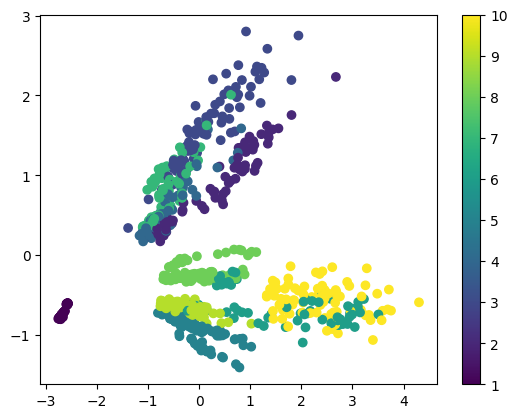

In [ ]:
#graficar espectro para clases representativas
sca_ = MinMaxScaler()
Xw_ = sca_.fit_transform(Xw.T).T
#red = TSNE(perplexity = 15,n_components=2,random_state=123,learning_rate='auto',init='pca')
red = PCA(n_components=2)
Z = red.fit_transform(Xw_)

plt.scatter(Z[:,0],Z[:,1],c=Ytrain, label='Xtrain')
plt.colorbar()
plt.show()

* Se plotea Xtrain y Xtest en función del tiempo

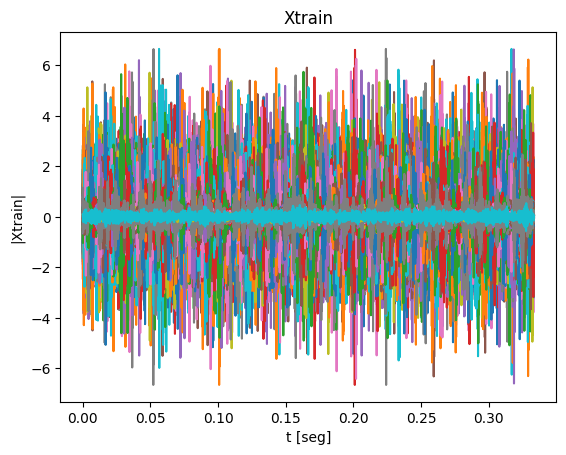

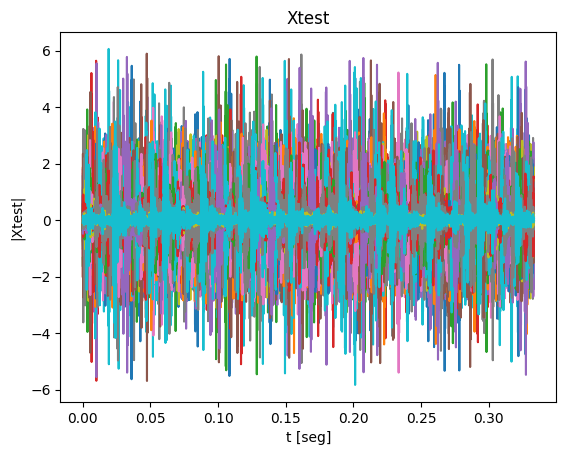

In [ ]:
tv = np.arange(0, Tl, 1/Fs)

plt.plot(tv, Xtrain.T)
plt.title('Xtrain')
plt.xlabel('t [seg]')
plt.ylabel('|Xtrain|')
plt.show()

plt.plot(tv, Xtest.T)
plt.title('Xtest')
plt.xlabel('t [seg]')
plt.ylabel('|Xtest|')
plt.show()

* Se plotea la señal promedio de Xtrain y Xtest en función del tiempo

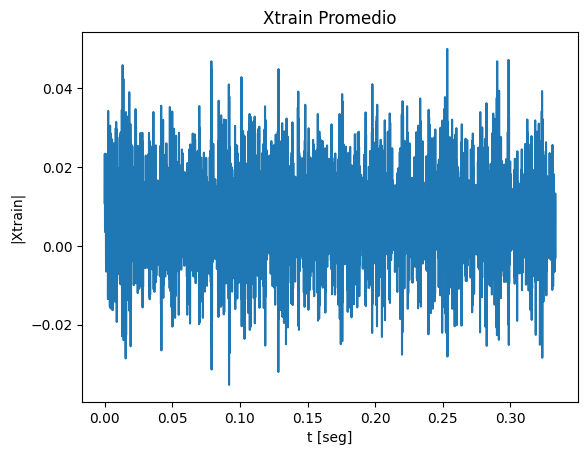

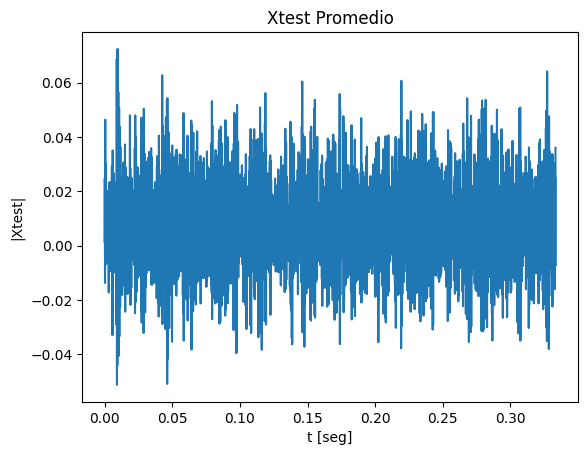

In [ ]:
plt.plot(tv, Xtrain.mean(axis=0).T)
plt.title('Xtrain Promedio')
plt.xlabel('t [seg]')
plt.ylabel('|Xtrain|')
plt.show()

plt.plot(tv, Xtest.mean(axis=0).T)
plt.title('Xtest Promedio')
plt.xlabel('t [seg]')
plt.ylabel('|Xtest|')
plt.show()

* Se plotea la componente espectral de Xtrain y Xtest

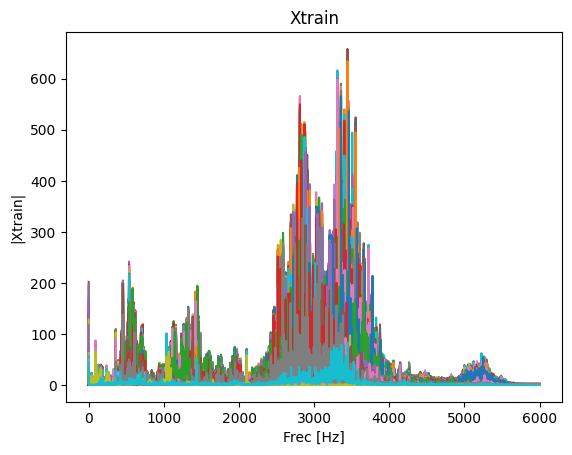

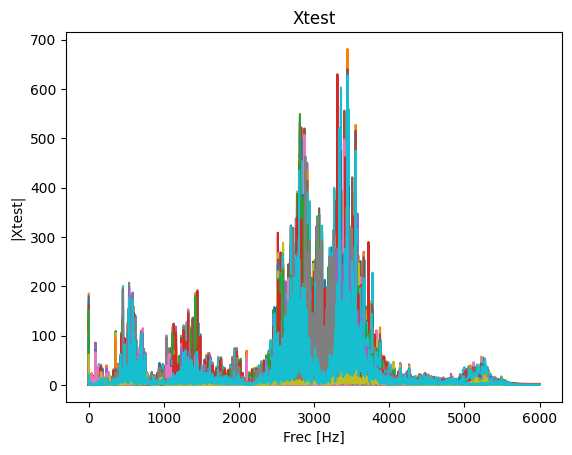

In [ ]:
plt.plot(vf, Xw.T)
plt.title('Xtrain')
plt.xlabel('Frec [Hz]')
plt.ylabel('|Xtrain|')
plt.show()

plt.plot(vft, Xwt.T)
plt.title('Xtest')
plt.xlabel('Frec [Hz]')
plt.ylabel('|Xtest|')
plt.show()

* Se plotea la señal promedio de Xtrain y Xtest en función de la frecuencia

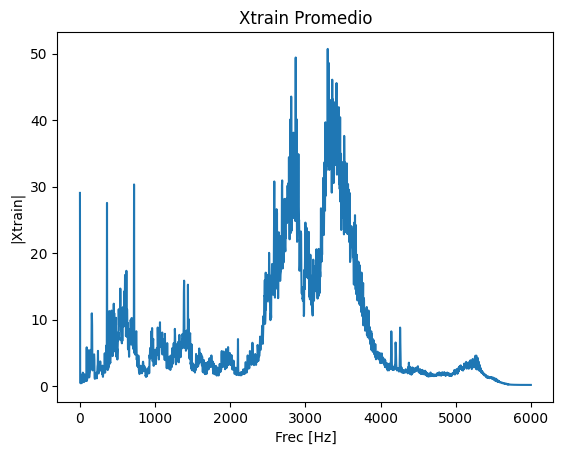

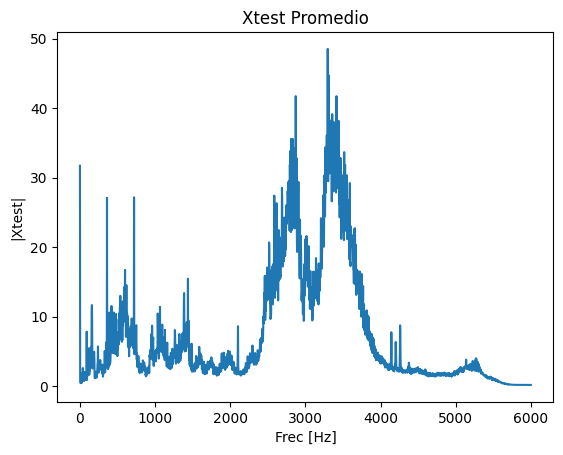

In [ ]:
plt.plot(vf, Xw.mean(axis=0).T)
plt.title('Xtrain Promedio')
plt.xlabel('Frec [Hz]')
plt.ylabel('|Xtrain|')
plt.show()

plt.plot(vf, Xwt.mean(axis=0).T)
plt.title('Xtest Promedio')
plt.xlabel('Frec [Hz]')
plt.ylabel('|Xtest|')
plt.show()

* Se normalizan los componentes espectrales y se grafican

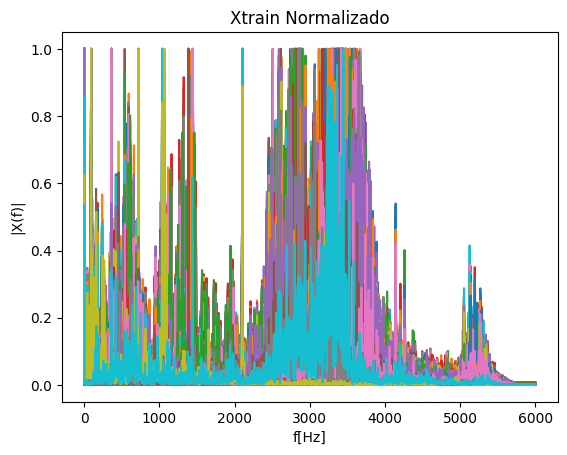

In [ ]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
sca = MinMaxScaler()
Xw_ = sca.fit_transform(Xw.T).T

plt.plot(vf, Xw_.T)
plt.title('Xtrain Normalizado')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

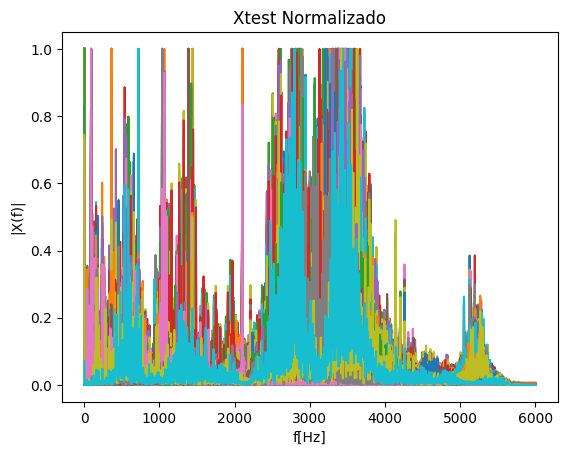

In [ ]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
sca = MinMaxScaler()
Xwt_ = sca.fit_transform(Xwt.T).T

plt.plot(vf,Xwt_.T)
plt.title('Xtest Normalizado')
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

* Se calcula la distancia entre los componentes espectrales de Xtrain y Xtest, se almacenan en un vector al que luego se le buscará el valor mínimo de cada fila, y ese será el tipo de fallo al que corresponda

In [ ]:
from scipy.spatial.distance import cdist

v_results = []

for i in range(len(Xtest)):
    distance = cdist(Xwt_, Xw_)
    v_results.append(Ytrain[np.argmin(distance[i,])])

* Se imprime el resultado de los fallos, indicando el tipo de fallo por el número de motor que se analizó, además de llevar un recuento de cuántos fallos hubo por tipo de fallo

In [ ]:
i = 1
recount = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0}
for result in v_results:
    print(f'El motor {i} presenta un error del tipo: {labels_[result-1]}')
    recount[str(result)] += 1
    i += 1

El motor 1 presenta un error del tipo: IR1_0.021
El motor 2 presenta un error del tipo: IR1_0.021
El motor 3 presenta un error del tipo: IR1_0.021
El motor 4 presenta un error del tipo: BE_0.014
El motor 5 presenta un error del tipo: IR1_0.007
El motor 6 presenta un error del tipo: BE_0.007
El motor 7 presenta un error del tipo: IR2_0.014
El motor 8 presenta un error del tipo: IR2_0.014
El motor 9 presenta un error del tipo: IR2_0.007
El motor 10 presenta un error del tipo: BE_0.021
El motor 11 presenta un error del tipo: IR1_0.021
El motor 12 presenta un error del tipo: IR2_0.014
El motor 13 presenta un error del tipo: IR2_0.014
El motor 14 presenta un error del tipo: IR1_0.014
El motor 15 presenta un error del tipo: IR2_0.007
El motor 16 presenta un error del tipo: IR2_0.014
El motor 17 presenta un error del tipo: BE_0.014
El motor 18 presenta un error del tipo: IR2_0.021
El motor 19 presenta un error del tipo: IR1_0.021
El motor 20 presenta un error del tipo: NOR
El motor 21 present

* Se imprime el número de fallos por categoría y el número total de fallos

In [ ]:
print(f'El total de fallos por categoría fue:\n')
i = 0
for fault in recount.keys():
    print(f'{labels_[int(fault)-1]}: {recount[fault]}')
    i += int(recount[fault])

print(f'\nFallos totales: {i}')

El total de fallos por categoría fue:

NOR: 45
IR1_0.007: 27
IR1_0.014: 37
IR1_0.021: 46
IR2_0.007: 33
IR2_0.014: 45
IR2_0.021: 32
BE_0.007: 30
BE_0.014: 30
BE_0.021: 35

Fallos totales: 360
